# Theory — Simple Linear Regression

What it solves
- Predict a numeric target y from a single feature x using a straight line.
- Examples: predict salary from years of experience; predict price from size.

Plain intuition
- Fit a line y ≈ b0 + b1 x through the cloud of points so that squared vertical distances are as small as possible.

Core math (Ordinary Least Squares)
- Model: y_i = b0 + b1 x_i + ε_i
- Objective: minimize MSE = (1/n) Σ (y_i − (b0 + b1 x_i))²
- Closed-form solution:
  b1 = cov(x,y) / var(x)
  b0 = ȳ − b1 x̄
- Predictions: ŷ = b0 + b1 x; Residuals: r_i = y_i − ŷ_i

Assumptions (diagnostics)
- Linearity, independent errors, constant variance (homoscedasticity), errors roughly normal (for inference).
- Outliers can pull the line; consider robust methods or inspect residuals.

Evaluation
- MSE, RMSE, MAE; R² = 1 − SS_res/SS_tot; visualize residuals vs fitted.

Tiny example (paper-and-pencil)
- x: [1,2,3], y: [2,2,4]
  x̄=2, ȳ=8/3
  cov(x,y) = [(1−2)(2−8/3) + (2−2)(2−8/3) + (3−2)(4−8/3)]/3 = (2/3)/3? (compute with sample or population definition)
  Using sample formulas gives b1 ≈ 1.0, b0 ≈ 1.0 → line y = 1 + 1·x

Pros, cons, pitfalls
- Pros: Interpretable, fast, closed-form.
- Cons: Only linear trend; sensitive to outliers.
- Pitfalls: Extrapolation risks; not checking residual plots.

How this notebook implements it
- Dataset: Salary_Data.csv
- Steps: split → fit LinearRegression → predict → evaluate/visualize scatter + fitted line.

Quick checklist
- Plot x vs y first.
- Fit, compute metrics, inspect residual plot.
- Beware of extrapolation outside x range.


# Simple Linear Regression

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Training the Simple Linear Regression model on the Training set

In [5]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Predicting the Test set results

In [6]:
y_pred = regressor.predict(X_test)

## Visualising the Training set results

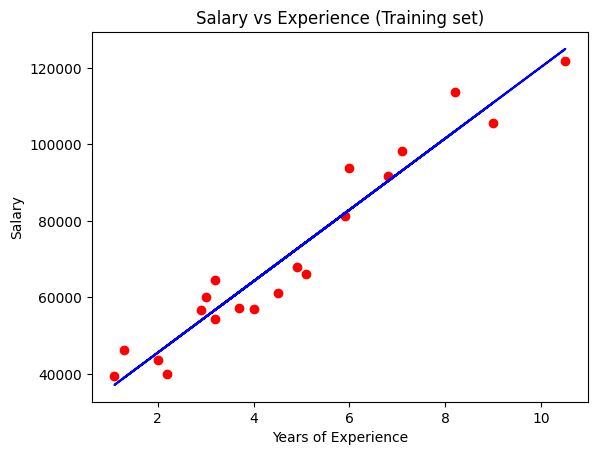

In [7]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

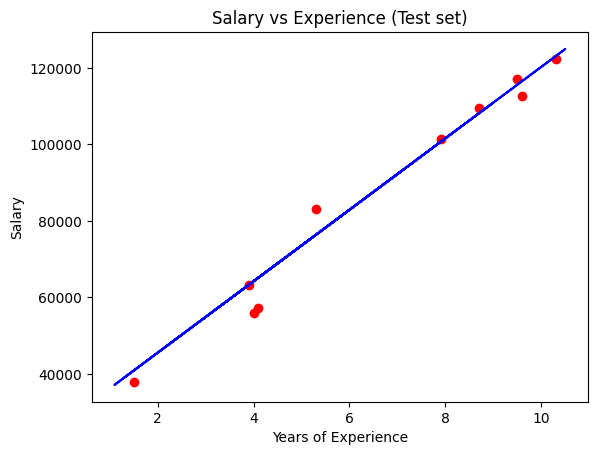

In [8]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()